In [ ]:
!pip --version

pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
!git clone https://github.com/NVlabs/stylegan3.git

Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 212 (delta 99), reused 90 (delta 90), pack-reused 49 (from 1)
Receiving objects: 100% (212/212), 4.16 MiB | 8.97 MiB/s, done.
Resolving deltas: 100% (108/108), done.


In [ ]:
%cd stylegan3

/kaggle/working/stylegan3


In [ ]:
!mkdir /kaggle/working/stylegan3/checkpoints
# get file from internet
!wget -O checkpoints/stylegan3-r-ffhq-1024x1024.pkl https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl

--2025-03-17 14:24:51--  https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl
Resolving api.ngc.nvidia.com (api.ngc.nvidia.com)... 34.214.150.232, 52.38.134.251
Connecting to api.ngc.nvidia.com (api.ngc.nvidia.com)|34.214.150.232|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://xfiles.ngc.nvidia.com/org/nvidia/team/research/models/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl?ssec-algo=AES256&ssec-key=3dNp6YUhldrZSVEhHWS1pIb7m4efdMWyNGMqLhiAubk3AaO5MrEL0zWJ5plkKG0UuOVfk5tXhNX6g2prOaYB0JKLML%2BbePggDKHBl3BXoPm2adGoFv%2FklqTl5hGgL%2B5h2h4ibGQaS2hL2uDogSMGdYx%2F6uNEQFsxvWcgp7%2BBem3Mxv4Dz2CpxdflPp%2BrUfw7iKqGoa3RUiiqGiL7eANQCNc9LY7pRypvhl22XkK4GJsfCZ2n7hMN0QefKHPcn3%2BFMoL7gBBL%2BpqwZN%2F9ygfSMeyRTluDcRWR0hki6W3gzjs0urFpUC9%2BZ01l0hzQa8b%2BZLVlDJDxxXIAO2kBd5vEntvQACDCqFbyFOutcPB39asYBbGjXOWd1z%2BZtnjhrf3wlBfXD81zNbxOln0bFmqfWuZb31mKPz6y6sl87CF3BXKPdlCuIg9sdh6jF6wDmd%2BkWdK7UsZy%2FcC

In [ ]:
import os
os.environ['TORCH_CUDA_ARCH_LIST'] = "7.5"
print("Done")

Done


In [ ]:
!pip install --upgrade --force-reinstall setuptools packaging

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
pandas-gbq 0.25.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
plotnine 0.14.4 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
tensorflow-

In [ ]:
!python gen_images.py --outdir=/kaggle/working/stylegan3/out --trunc=1 --seeds=9,9,77 --network=/kaggle/input/fitz_140/pytorch/default/1/network-snapshot-000140.pkl

Loading networks from "/kaggle/input/fitz_140/pytorch/default/1/network-snapshot-000140.pkl"...
Generating image for seed 9 (0/3) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
^C
Failed!

Aborted!


In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

image_dir = 'out'

def display_image(image_dir):
  # Check if the directory contains images
    if os.path.exists(image_dir):
        images = [Image.open(os.path.join(image_dir, img)) for img in os.listdir(image_dir) if img.endswith('.png')]
        if images:
            # Display images
            fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
            for ax, img in zip(axes, images):
                ax.imshow(img)
                ax.axis('off')
            plt.show()
        else:
            print("No images found in the output directory.")
    else:
        print("Output directory does not exist.")

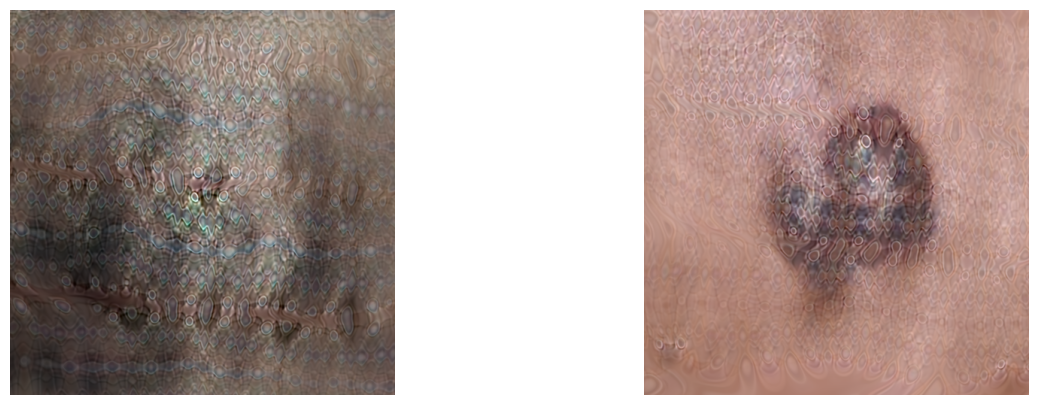

In [ ]:
display_image(image_dir)

## Now train with our custom image data

In [ ]:
from PIL import Image
import os

input_folder = '/kaggle/input/df-darker-malignant-512'
output_folder = '/kaggle/working/resized/images'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img = Image.open(os.path.join(input_folder, filename))
        img = img.resize((512, 512), Image.LANCZOS)
        img.save(os.path.join(output_folder, filename))

In [ ]:
!python dataset_tool.py --source /kaggle/working/resized/images --dest /kaggle/working/lmdb/data.zip --max-images 1000 --transform=center-crop --resolution=512x512

100%|█████████████████████████████████████████| 208/208 [00:04<00:00, 50.39it/s]


In [ ]:
!python train.py --gpus 2 --data /kaggle/working/lmdb/data.zip --outdir /kaggle/working/pretrained/model.pkl --snap 1 --metrics=None --cfg stylegan3-t --batch 8 --gamma 8.2


Training options:
{
  "G_kwargs": {
    "class_name": "training.networks_stylegan3.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "channel_base": 32768,
    "channel_max": 512,
    "magnitude_ema_beta": 0.9994456359721023
  },
  "D_kwargs": {
    "class_name": "training.networks_stylegan2.Discriminator",
    "block_kwargs": {
      "freeze_layers": 0
    },
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
    "channel_max": 512
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0025
  },
  "D_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.002
  },
  "loss_kwargs": {
    "class_name": "training.loss.StyleGAN2Loss",
    "r1_gamma": 8.2
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "prefetch_fact

In [ ]:
!python train.py --gpus 2 --data /kaggle/working/lmdb/data.zip --outdir /kaggle/working/pretrained/model.pkl --snap 1 --metrics=None --cfg stylegan3-t --batch 8 --gamma 8.2 --mirror=1 --resume=/kaggle/input/fitz_140/pytorch/default/1/network-snapshot-000140.pkl


Training options:
{
  "G_kwargs": {
    "class_name": "training.networks_stylegan3.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "channel_base": 32768,
    "channel_max": 512,
    "magnitude_ema_beta": 0.9997227795604651
  },
  "D_kwargs": {
    "class_name": "training.networks_stylegan2.Discriminator",
    "block_kwargs": {
      "freeze_layers": 0
    },
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
    "channel_max": 512
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0025
  },
  "D_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.002
  },
  "loss_kwargs": {
    "class_name": "training.loss.StyleGAN2Loss",
    "r1_gamma": 8.2,
    "blur_init_sigma": 0
  },
  "data_loader_kwargs": {
    "pin_memory"

In [ ]:
!python train.py --gpus 2 --data /kaggle/working/lmdb/data.zip --outdir /kaggle/working/pretrained/model.pkl --snap 1 --metrics=None --cfg stylegan3-t --batch 8 --gamma 8.2 --mirror=1 --resume=/kaggle/input/fitz_140/pytorch/default/2/network-snapshot-000132.pkl


Training options:
{
  "G_kwargs": {
    "class_name": "training.networks_stylegan3.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "channel_base": 32768,
    "channel_max": 512,
    "magnitude_ema_beta": 0.9997227795604651
  },
  "D_kwargs": {
    "class_name": "training.networks_stylegan2.Discriminator",
    "block_kwargs": {
      "freeze_layers": 0
    },
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
    "channel_max": 512
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0025
  },
  "D_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.002
  },
  "loss_kwargs": {
    "class_name": "training.loss.StyleGAN2Loss",
    "r1_gamma": 8.2,
    "blur_init_sigma": 0
  },
  "data_loader_kwargs": {
    "pin_memory"

# Now load final last model and generate sample

In [ ]:
import os
import subprocess

# Set parameters
outdir = "/kaggle/working/stylegan3/out"
network_path = "/kaggle/input/fitz_140/pytorch/default/3/network-snapshot-000124_2.pkl"
seeds = list(range(1, 151))  # Seeds for generating 150 images

# Ensure output directory exists
os.makedirs(outdir, exist_ok=True)

# Generate images for each seed
for seed in seeds:
    command = f"python gen_images.py --outdir={outdir} --trunc=1 --seeds={seed} --network={network_path}"
    subprocess.run(command, shell=True)


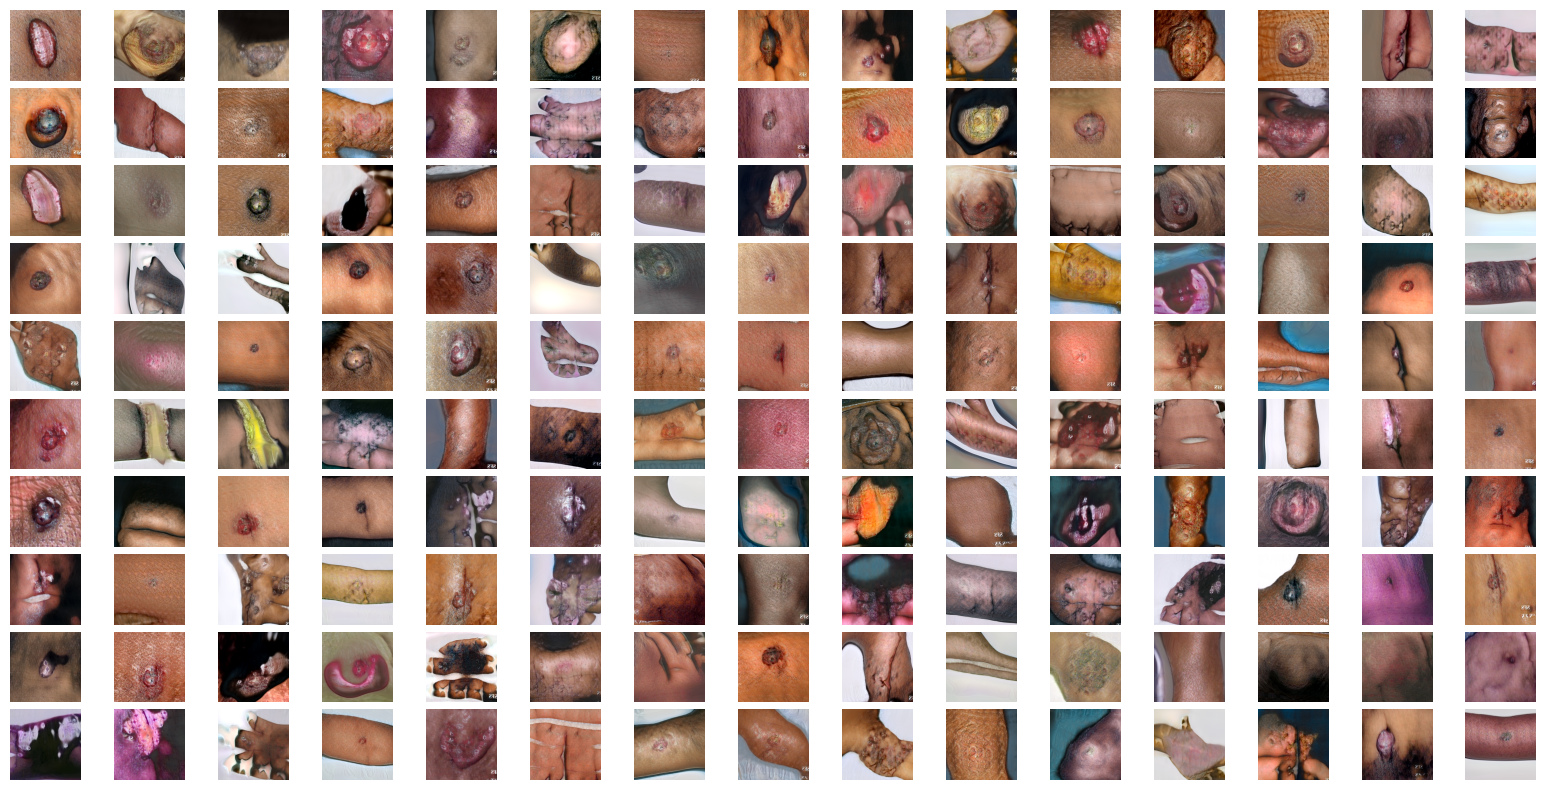

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

# Define the directory containing the images
image_dir = '/kaggle/working/stylegan3/out'  # Adjust this to your image folder

# Get a list of image files in the directory (ensure they are .png or .jpg)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('png', 'jpg', 'jpeg'))]

# Limit to the first 150 images
image_files = image_files[:150]

# Create a figure with a grid of 10 rows and 15 columns
fig, axes = plt.subplots(10, 15, figsize=(20, 10))  # Adjust figure size if needed
axes = axes.flatten()  # Flatten the axes to make iteration easier

# Loop through the first 150 images and plot them
for i, img_file in enumerate(image_files):
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)

    # Convert image to RGB if necessary (in case it's RGBA or other formats)
    img = img.convert('RGB')

    # Plot the image on the corresponding axis
    axes[i].imshow(np.array(img))
    axes[i].axis('off')  # Hide axis

# Adjust the layout
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


In [ ]:
import zipfile
import os

# Define the folder to zip and the output zip file path
folder_path = '/kaggle/working/stylegan3/out'  # Adjust to your folder
zip_file_path = '/kaggle/working/stylegan3/out.zip'  # This will create a zip file named 'out.zip'

# Create a zip file and add the contents of the folder
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Walk through the folder and add files to the zip file
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

print(f"Folder '{folder_path}' has been zipped into '{zip_file_path}'")


Folder '/kaggle/working/stylegan3/out' has been zipped into '/kaggle/working/stylegan3/out.zip'
